### **INIT SPARK CONTEXT AND SET CONFIGURATIONS**

In [2]:
import findspark
findspark.init()

In [3]:
import pyspark
import random
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SQLContext

conf = SparkConf().setAppName("App")
conf = (conf.setMaster('local[*]')
        .set('spark.executor.memory', '4G')
        .set('spark.driver.memory', '30G')
        .set('spark.driver.maxResultSize', '10G'))

sc = SparkContext.getOrCreate(conf=conf)
sqlContext = SQLContext(sc)

#### **LOAD DATA FILES**

In [4]:
processed_path = '/home/altieris/datascience/data/curitibaurbs/processed/'

In [5]:
linhas = sqlContext.read.json(processed_path+'linhas/')
linhas.registerTempTable("linhas")

In [6]:
pontosLinha = sqlContext.read.json(processed_path+'pontoslinha/')
pontosLinha.registerTempTable("pontos_linha")

In [7]:
tabelaVeiculo = sqlContext.read.json(processed_path+'tabelaveiculo/')
tabelaVeiculo.registerTempTable("tabela_veiculo")

In [8]:
tabelaLinha = sqlContext.read.json(processed_path+'tabelalinha/')
tabelaLinha.registerTempTable("tabela_linha")

In [9]:
trechosItinerarios = sqlContext.read.json(processed_path+'trechositinerarios/')
trechosItinerarios.registerTempTable("trechos_itinerarios")

In [10]:
categoriasOnibus = trechosItinerarios.select('COD_CATEGORIA','NOME_CATEGORIA').distinct()
categoriasOnibus.registerTempTable("categorias_onibus")

In [11]:
tipoItinerarios = trechosItinerarios.select('COD_ITINERARIO','NOME_ITINERARIO').distinct()
tipoItinerarios.registerTempTable("tipos_itinerarios")

In [12]:
empresasOnibus = trechosItinerarios.select("COD_EMPRESA","NOME_EMPRESA").distinct()
empresasOnibus.registerTempTable("empresas_onibus")

In [13]:
# position_events = sqlContext.read.json(processed_path+'veiculos/')
# position_events.registerTempTable("veiculos")

#### **SHOW DATA**

In [14]:
def executeQuery(table_name):
    query = 'select * from {} limit 10'.format(table_name)
    
    return sqlContext.sql(query)

In [15]:
executeQuery('linhas').toPandas().head()

,CATEGORIA_SERVICO,COD,NOME,NOME_COR,SOMENTE_CARTAO,SOURCEDATE
0,CONVENCIONAL,464,A. MUNHOZ / J. BOTANICO,AMARELA,S,2019-02-27
1,ALIMENTADOR,226,ABAETE,LARANJA,N,2019-02-27
2,TRONCAL,182,ABRANCHES,AMARELA,N,2019-02-27
3,ALIMENTADOR,332,ACROPOLE,LARANJA,N,2019-02-27
4,ALIMENTADOR,334,AGRICOLA,LARANJA,N,2019-02-27


In [16]:
executeQuery('pontos_linha').toPandas().head()

,COD,GRUPO,ITINERARY_ID,LAT,LON,NOME,NUM,SENTIDO,SEQ,SOURCEDATE,TIPO
0,010,,481,-25.422482678274,-49.284327553297,"Av. Manoel Ribas, 531 - Merces",110037,Horario,39,2019-03-17,Novo mobiliario
1,010,,481,-25.432681513162,-49.258593202776,"Av. Visc. de Guarapuava, 1692 - Centro",140204,Horario,11,2019-03-17,Novo mobiliario
2,010,,481,-25.432206677422,-49.292185860119,"R. Cap. Souza Franco, 661 - Bigorrilho",180042,Horario,34,2019-03-17,Novo mobiliario
3,011,,482,-25.442672993214,-49.288137735075,"Av. do Batel, 1614 - Batel",180067,Anti-horario,21,2019-03-17,Novo mobiliario
4,011,,482,-25.450261873841,-49.259898163195,"Rua Rockefeller, 1424 - Prado Velho",140265,Anti-horario,31,2019-03-17,Novo mobiliario


In [17]:
executeQuery('tabela_veiculo').toPandas().head()

,COD_LINHA,COD_PONTO,HORARIO,NOME_LINHA,SOURCEDATE,TABELA,VEICULO
0,509,,00:00,MAD. BOQUEIR?O,2019-03-01,1,KB499
1,519,,00:05,MAD. S. FRANCISCO / IGUAPE,2019-03-01,1,EA183
2,509,,00:05,MAD. BOQUEIR?O,2019-03-01,1,KB499
3,608,,00:05,MAD. PINHEIRINHO,2019-03-01,1,HA259
4,209,,00:10,MAD. S. CANDIDA / C. RASO,2019-03-01,1,BC928


In [18]:
executeQuery('tabela_linha').toPandas().head()

,ADAPT,COD,DIA,HORA,NUM,PONTO,SOURCEDATE,TABELA
0,ELEVADOR,989,1,01:10,,PRACA RUI BARBOSA-CHEGADA MAD.,2019-01-25,1
1,ELEVADOR,989,1,01:20,,PRACA RUI BARBOSA-SAIDA MAD.,2019-01-25,1
2,ELEVADOR,989,1,02:20,,PRACA RUI BARBOSA-CHEGADA MAD.,2019-01-25,1
3,ELEVADOR,989,1,02:30,,PRACA RUI BARBOSA-SAIDA MAD.,2019-01-25,1
4,ELEVADOR,989,1,03:35,,PRACA RUI BARBOSA-CHEGADA MAD.,2019-01-25,1


In [19]:
executeQuery('trechos_itinerarios').drop('CODIGO_URBS','NOME_EMPRESA','NOME_CATEGORIA','NOME_LINHA','NOME_ITINERARIO','STOP_NAME','TIPO_TRECHO').toPandas().head()

,COD_CATEGORIA,COD_EMPRESA,COD_ITINERARIO,COD_LINHA,COD_PTO_PARADA_TH,COD_PTO_TRECHO_A,COD_PTO_TRECHO_B,EXTENSAO_TRECHO_A_ATE_B,NOME_PTO_ABREVIADO,NOME_PTO_PARADA_TH,PTO_ESPECIAL,SEQ_PONTO_TRECHO_A,SEQ_PONTO_TRECHO_B,SEQ_PTO_ITI_TH,SOURCEDATE,STOP_CODE
0,5,004,909,340,806,806,488,3.148,B.ALTO,TERMINAL BAIRRO ALTO,N,5688,5689,5688,2019-03-15,109120
1,5,004,909,340,908,908,806,3.203,DETRAN/BAI,TUBO DETRAN (SENTIDO BAIRRO),N,5900,5688,5900,2019-03-15,109024
2,5,004,909,340,806,806,908,4.197,B.ALTO,TERMINAL BAIRRO ALTO,N,5688,5900,5688,2019-03-15,109120
3,5,004,909,340,488,488,806,3.162,DETRAN/CEN,TUBO DETRAN (SENTIDO CENTRO),S,5689,5688,5689,2019-03-15,109025
4,1,011,676,616,1192,1192,1193,5.86,PORTAO-FAN,PORTAO-LINHA VERDE(SENT.FANNY),N,5014,5015,5014,2019-03-15,105807


In [20]:
executeQuery('categorias_onibus').toPandas().head()

,COD_CATEGORIA,NOME_CATEGORIA
0,27,LIGEIR?O
1,8,CONVENCIONAL
2,6,TRONCAL
3,12,CIRCULAR CENTRO
4,15,MADRUGUEIRO


In [21]:
 executeQuery('empresas_onibus').toPandas().head()

,COD_EMPRESA,NOME_EMPRESA
0,009,ARAUCARIA/TRANSBUS
1,010,MERCES/PONTUAL
2,011,SORRISO/PIONEIRO
3,003,GLORIA/PONTUAL
4,002,TAMANDARE/PIONEIRO


In [22]:
#executeQuery('veiculos').toPandas().head()

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(25.7,8.27)})


In [24]:
query = 'select count(distinct ti.cod_linha) as nr_linhas,emp.nome_empresa ' \
        'from trechos_itinerarios ti inner join empresas_onibus emp on (ti.cod_empresa = emp.cod_empresa) ' \
        'where sourcedate =\'2019-03-14\' ' \
        'group by emp.nome_empresa '\
        'order by nr_linhas desc' 
    
linhas_empresa = sqlContext.sql(query).toPandas()

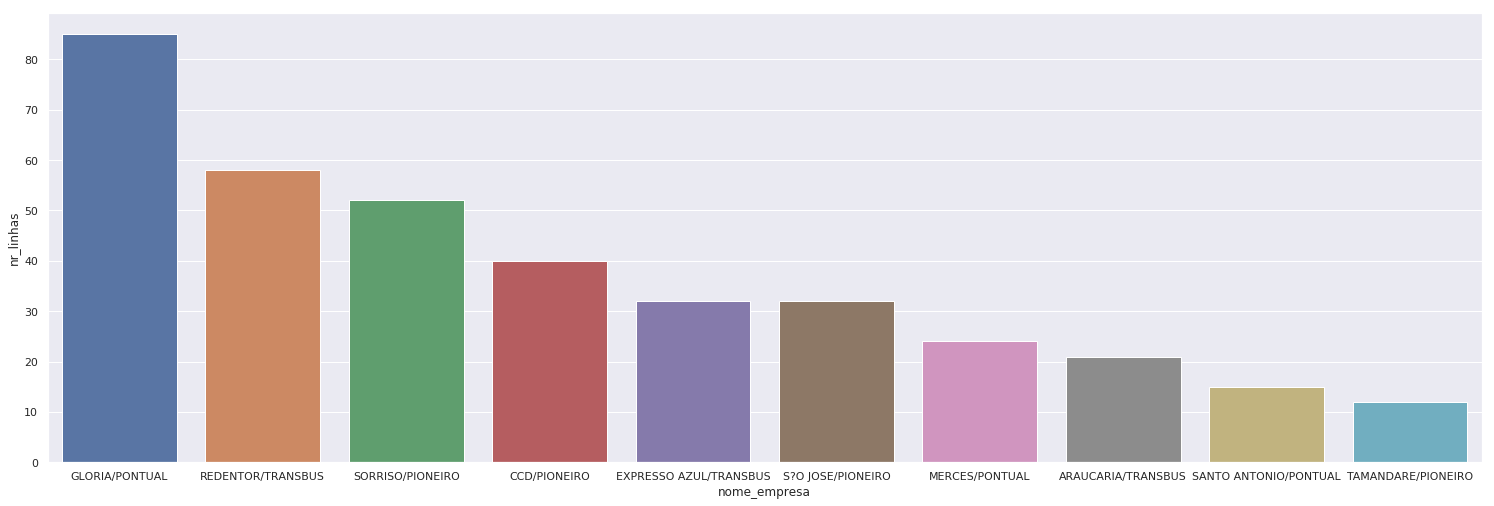

In [25]:
plt.figure(figsize=(25.7,8.27))
sns.barplot(x="nome_empresa", y="nr_linhas", data=linhas_empresa)

In [26]:
query = "select  cat.nome_categoria,emp.nome_empresa,count( distinct li.cod) as qtd_linhas " \
"from trechos_itinerarios ti " \
"inner join categorias_onibus cat on (ti.cod_categoria = cat.cod_categoria) " \
"inner join empresas_onibus emp  on (ti.cod_empresa = emp.cod_empresa) " \
"inner join linhas li on (ti.cod_linha = li.cod and ti.sourcedate = li.sourcedate) " \
"where ti.sourcedate = '2019-03-14' group by cat.nome_categoria,emp.nome_empresa order by qtd_linhas desc"

nr_onibus_categoria_empresa = sqlContext.sql(query).toPandas()
nr_onibus_categoria_empresa.head(10)

,nome_categoria,nome_empresa,qtd_linhas
0,CONVENCIONAL,GLORIA/PONTUAL,34
1,ALIMENTADOR,REDENTOR/TRANSBUS,31
2,ALIMENTADOR,GLORIA/PONTUAL,28
3,ALIMENTADOR,SORRISO/PIONEIRO,25
4,ALIMENTADOR,S?O JOSE/PIONEIRO,17
5,ALIMENTADOR,EXPRESSO AZUL/TRANSBUS,15
6,CONVENCIONAL,CCD/PIONEIRO,13
7,ALIMENTADOR,CCD/PIONEIRO,12
8,ALIMENTADOR,MERCES/PONTUAL,9
9,TRONCAL,GLORIA/PONTUAL,8


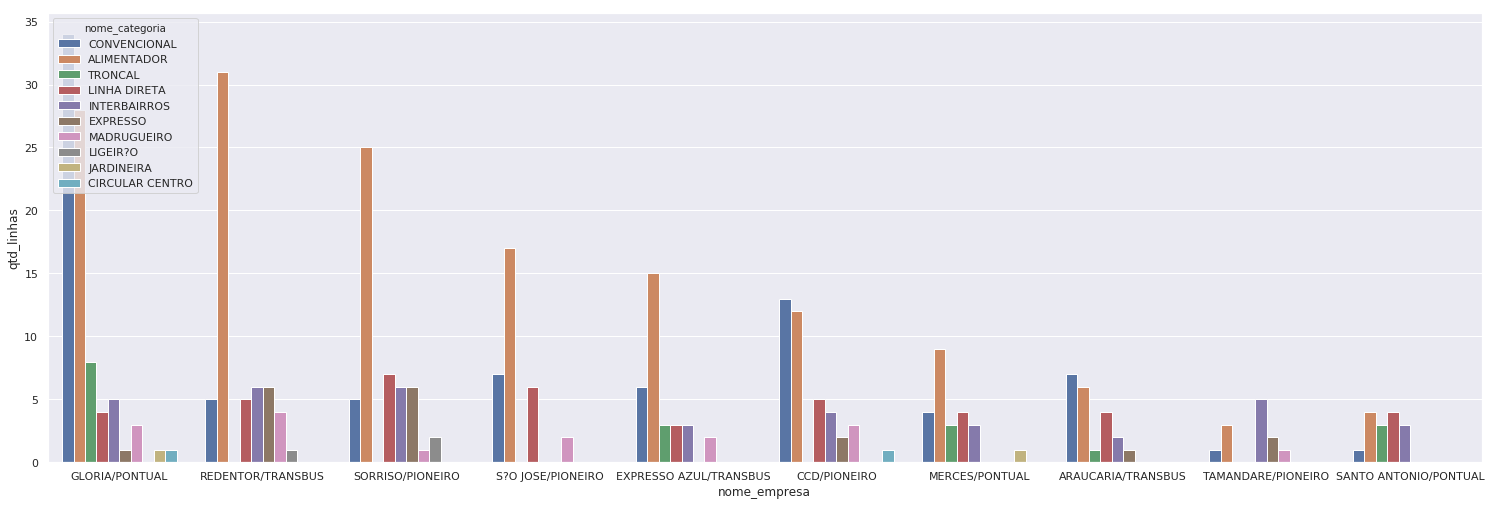

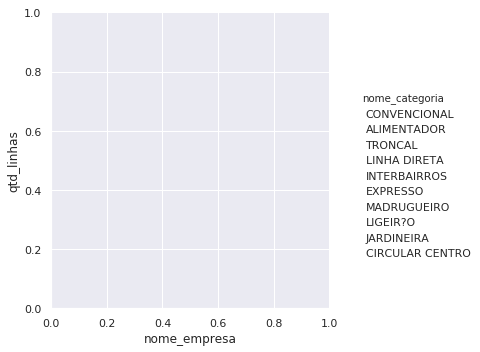

In [27]:
fig, ax = plt.subplots(figsize=(25.7,8.27))

sns.catplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa, kind="bar",ax=ax)
